# Data description

The dataset we are using for analysis:
* Segmenting and Clustering Neighborhoods in New York City :https://codekarim.com/node/57
* NYPD Arrest Data: https://www.kaggle.com/datasets/thaddeussegura/nypd-arrest-data-20062019
* NYC Airbnb Data: https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data
* NYC property Sales: https://www.kaggle.com/datasets/johnshuford/new-york-city-property-sales
* NYC motor vehicle collision: https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95

## Data preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager as fm
from  matplotlib import cm
import json
import requests
from pandas.io.json import json_normalize
from geopy.distance import geodesic

In [72]:
crimeData = pd.read_csv("data/NYPD_Arrests_Data__Historic_.csv").dropna()
collisionData = pd.read_csv("data/Motor_Vehicle_Collisions_-_Crashes.csv")
airbnbData = pd.read_csv("data/AB_NYC_2019.csv").dropna()

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### variables in the crime data

In [5]:
print (crimeData.dtypes)

ARREST_KEY             int64
ARREST_DATE           object
PD_CD                float64
PD_DESC               object
KY_CD                float64
OFNS_DESC             object
LAW_CODE              object
LAW_CAT_CD            object
ARREST_BORO           object
ARREST_PRECINCT        int64
JURISDICTION_CODE    float64
AGE_GROUP             object
PERP_SEX              object
PERP_RACE             object
X_COORD_CD           float64
Y_COORD_CD           float64
Latitude             float64
Longitude            float64
Lon_Lat               object
dtype: object


### variables in the collision data

In [6]:
print (collisionData.dtypes)

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

### variables in the airbnb data

In [7]:
print (airbnbData.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


## Show crime distribution from NYPD in pie chart

In [8]:
def plotPieChart(data,label,title):
    fig, axes = plt.subplots(figsize=(15,15),ncols=2)
    ax1, ax2 = axes.ravel()

    colors = cm.rainbow(np.arange(len(data))/len(data))# colormaps: Paired, autumn, rainbow, gray,spring,Darks
    patches, texts, autotexts = ax1.pie(data, labels=labels, autopct='%1.0f%%',
        shadow=False, startangle=170, colors=colors)

    ax1.axis('equal')  
    
    proptease = fm.FontProperties()
    proptease.set_size('xx-small')
    # font size include: ‘xx-small’,x-small’,'small’,'medium’,‘large’,‘x-large’,‘xx-large’ or number, e.g. '12'
    plt.setp(autotexts, fontproperties=proptease)
    plt.setp(texts, fontproperties=proptease)

    ax1.set_title(title, loc='center')
    ax2.axis('off')
    ax2.legend(patches, labels, loc='center left')

    plt.tight_layout()
    plt.savefig('Demo_project_set_legend_good.jpg')
    plt.show()

In [9]:
crimeData.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
3,189714430,11/07/2018,117.0,RECKLESS ENDANGERMENT 1,126.0,MISCELLANEOUS PENAL LAW,PL 1202500,F,M,26,0.0,45-64,M,WHITE,993685.0,233346.0,40.807160,-73.965920,POINT (-73.96591978699998 40.80715993100006)
5,190017529,11/15/2018,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,B,47,0.0,45-64,M,BLACK,1026486.0,262591.0,40.887333,-73.847250,POINT (-73.84725001299995 40.88733281800006)
10,189678705,11/07/2018,175.0,"SEXUAL ABUSE 3,2",233.0,SEX CRIMES,PL 13052A1,M,B,52,0.0,25-44,M,BLACK,1017542.0,255919.0,40.869059,-73.879630,POINT (-73.87963014799993 40.86905853200005)
14,189068425,10/22/2018,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,94,0.0,45-64,M,BLACK,995886.0,200705.0,40.717566,-73.958026,POINT (-73.95802570099994 40.71756616100004)
15,65864442,09/17/2009,164.0,SODOMY 3,116.0,SEX CRIMES,PL 1304002,F,S,122,0.0,25-44,M,BLACK HISPANIC,954943.0,148360.0,40.573850,-74.105496,POINT (-74.10549615599997 40.573849649000074)


Let's take a look a the distrubation of crime type and where they happend

In [10]:
typeCount = crimeData['OFNS_DESC']
typeCount = typeCount.value_counts(sort=True)
labels =typeCount.index
number = np.array(typeCount)

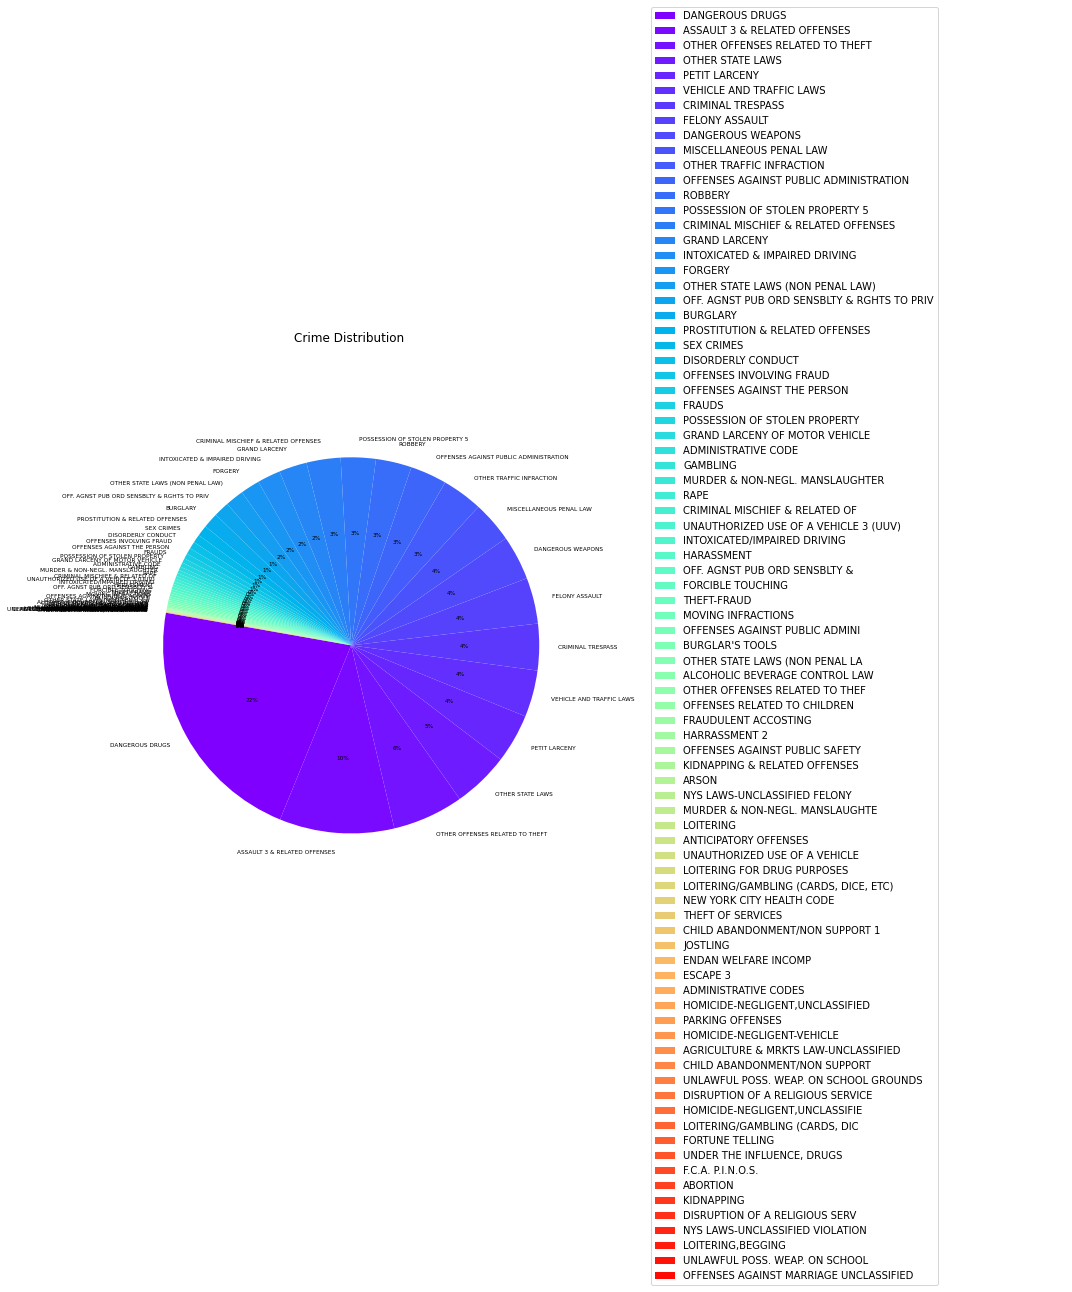

In [11]:
plotPieChart(number,labels, "Crime Distribution")

Then, let's take a look a how these arrests distribute amoung boroughs.

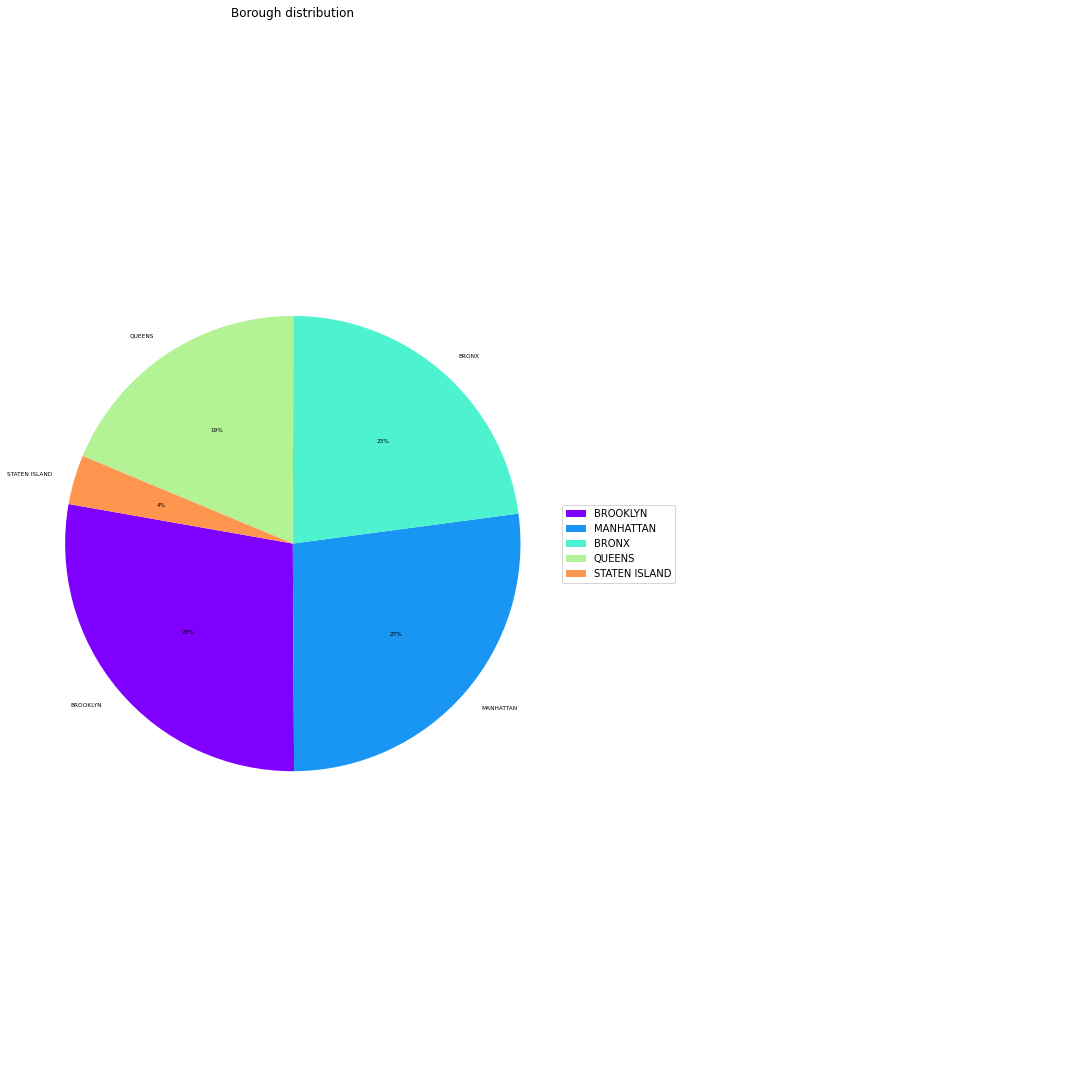

In [12]:
typeBorough = crimeData['ARREST_BORO']
typeBorough = typeBorough.replace(['K','Q','M','B','S'], ['BROOKLYN', 'QUEENS', 'MANHATTAN', 'BRONX', 'STATEN ISLAND'])
typeCountB = typeBorough.value_counts()
labels = typeCountB.index
numberB = np.array(typeCountB)
plotPieChart(typeCountB,labels,"Borough distribution")

Based on previous pie chart, we select severl crime that happens alot and might affect house rent and sale prices.
There Assault, theft, and trespassing. We check these types of crime separatly in different borough.

In [13]:
crimeGivenBorough = crimeData[['OFNS_DESC','ARREST_BORO']]

In [14]:
assult = crimeGivenBorough.loc[crimeGivenBorough['OFNS_DESC']=='ASSAULT 3 & RELATED OFFENSES']
theft = crimeGivenBorough.loc[crimeGivenBorough['OFNS_DESC']=='OTHER OFFENSES RELATED TO THEFT']
threspassing = crimeGivenBorough.loc[crimeGivenBorough['OFNS_DESC']=='CRIMINAL TRESPASS']

Lets plot them out

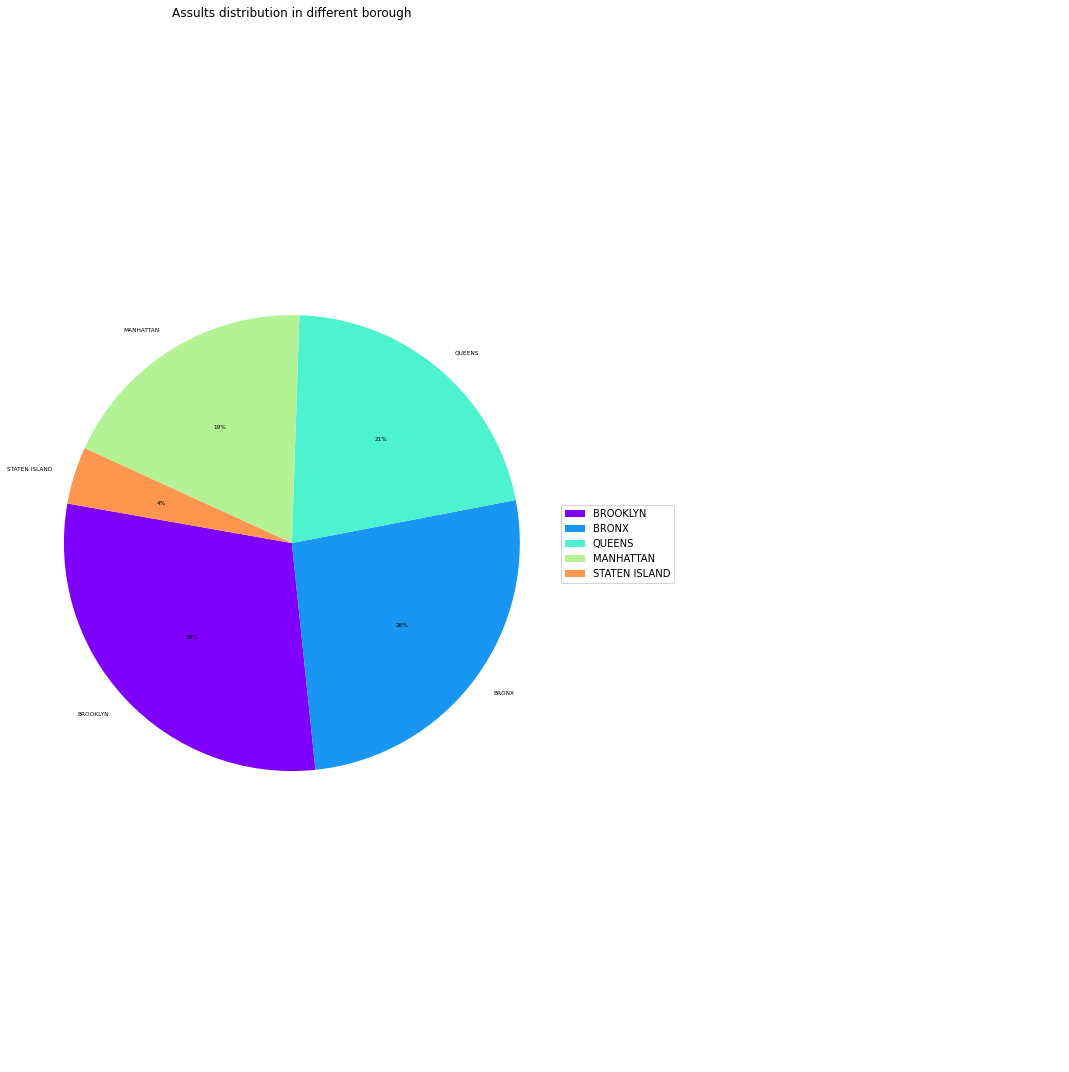

In [15]:
data = assult['ARREST_BORO']
data = data.replace(['K','Q','M','B','S'], ['BROOKLYN', 'QUEENS', 'MANHATTAN', 'BRONX', 'STATEN ISLAND'])
data = data.value_counts()
labels = data.index
plotPieChart(data,labels,"Assults distribution in different borough")

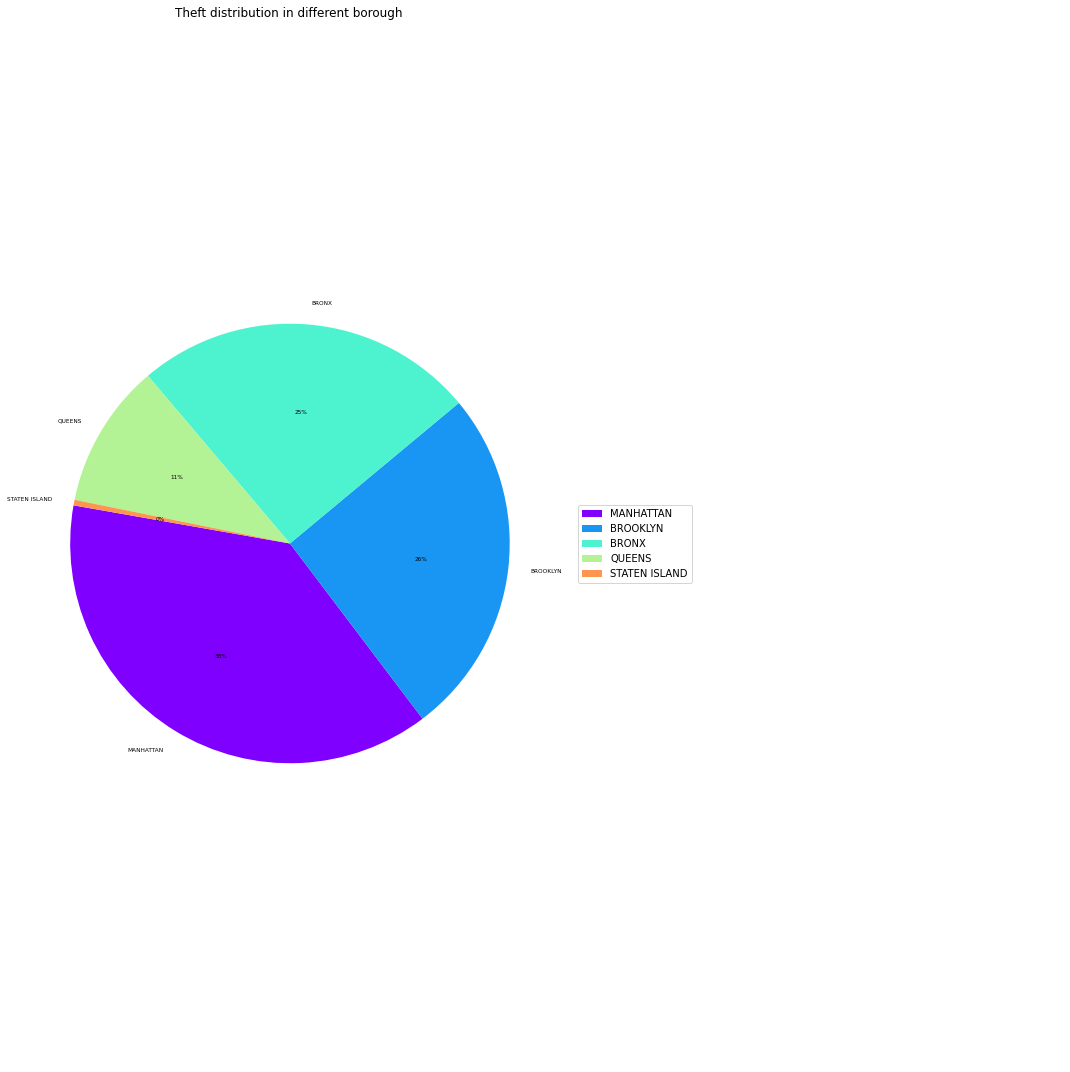

In [16]:
data = theft['ARREST_BORO']
data = data.replace(['K','Q','M','B','S'], ['BROOKLYN', 'QUEENS', 'MANHATTAN', 'BRONX', 'STATEN ISLAND'])
data = data.value_counts()
labels = data.index
plotPieChart(data,labels,"Theft distribution in different borough")

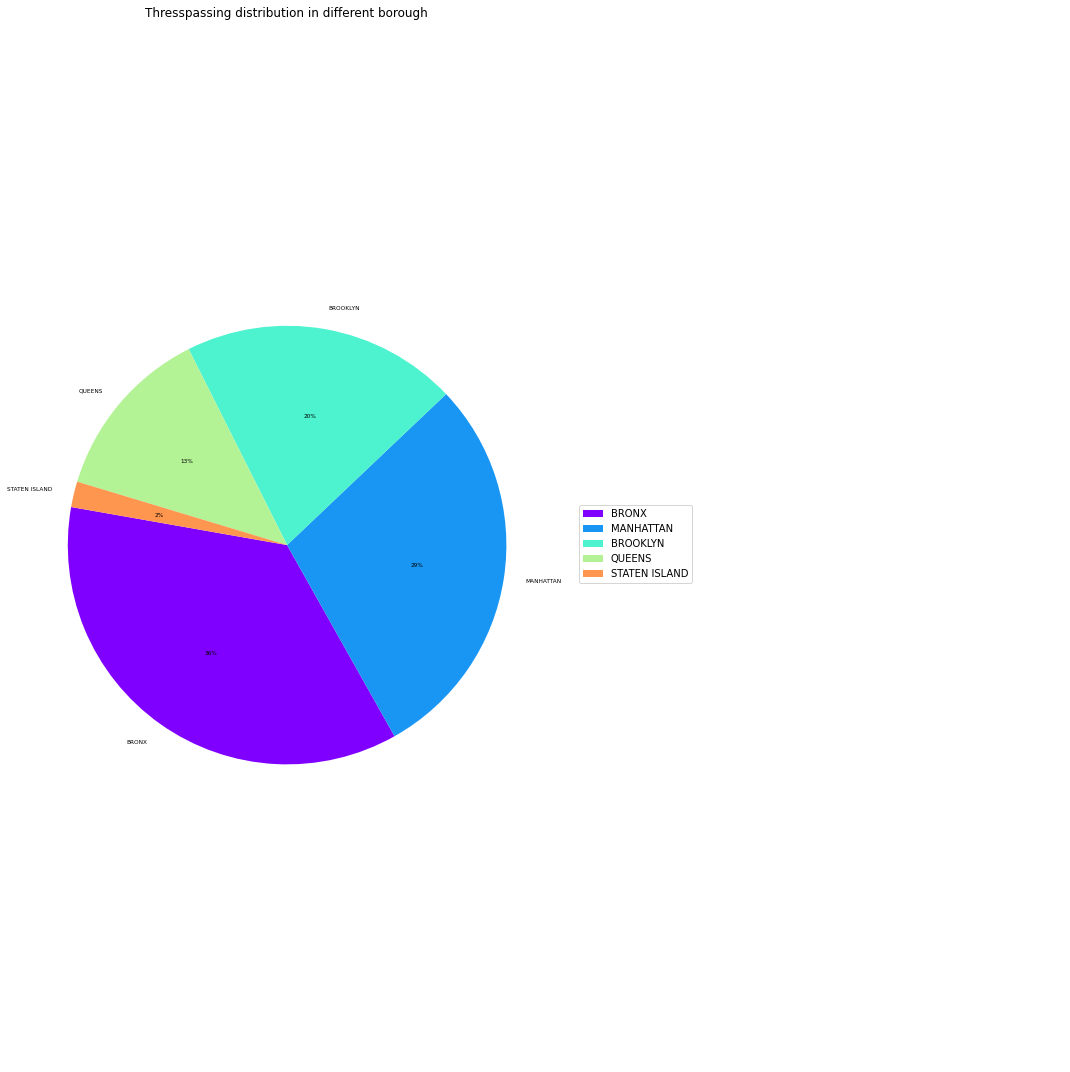

In [17]:
data = threspassing['ARREST_BORO']
data = data.replace(['K','Q','M','B','S'], ['BROOKLYN', 'QUEENS', 'MANHATTAN', 'BRONX', 'STATEN ISLAND'])
data = data.value_counts()
labels = data.index
plotPieChart(data,labels,"Thresspassing distribution in different borough")

Lets now have a view of collision data and how these collision distributed among boroughs

In [18]:
collisionData.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,04/14/2021,5:32,NaN,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4407480,Sedan,Sedan,NaN,NaN,NaN
1,04/13/2021,21:35,BROOKLYN,11217.0,40.68358,-73.97617,"(40.68358, -73.97617)",NaN,NaN,620 ATLANTIC AVENUE,...,NaN,NaN,NaN,NaN,4407147,Sedan,NaN,NaN,NaN,NaN
2,04/15/2021,16:15,NaN,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4407665,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,04/13/2021,16:00,BROOKLYN,11222.0,NaN,NaN,NaN,VANDERVORT AVENUE,ANTHONY STREET,NaN,...,Unspecified,NaN,NaN,NaN,4407811,Sedan,NaN,NaN,NaN,NaN
4,04/12/2021,8:25,NaN,NaN,0.00000,0.00000,"(0.0, 0.0)",EDSON AVENUE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4406885,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


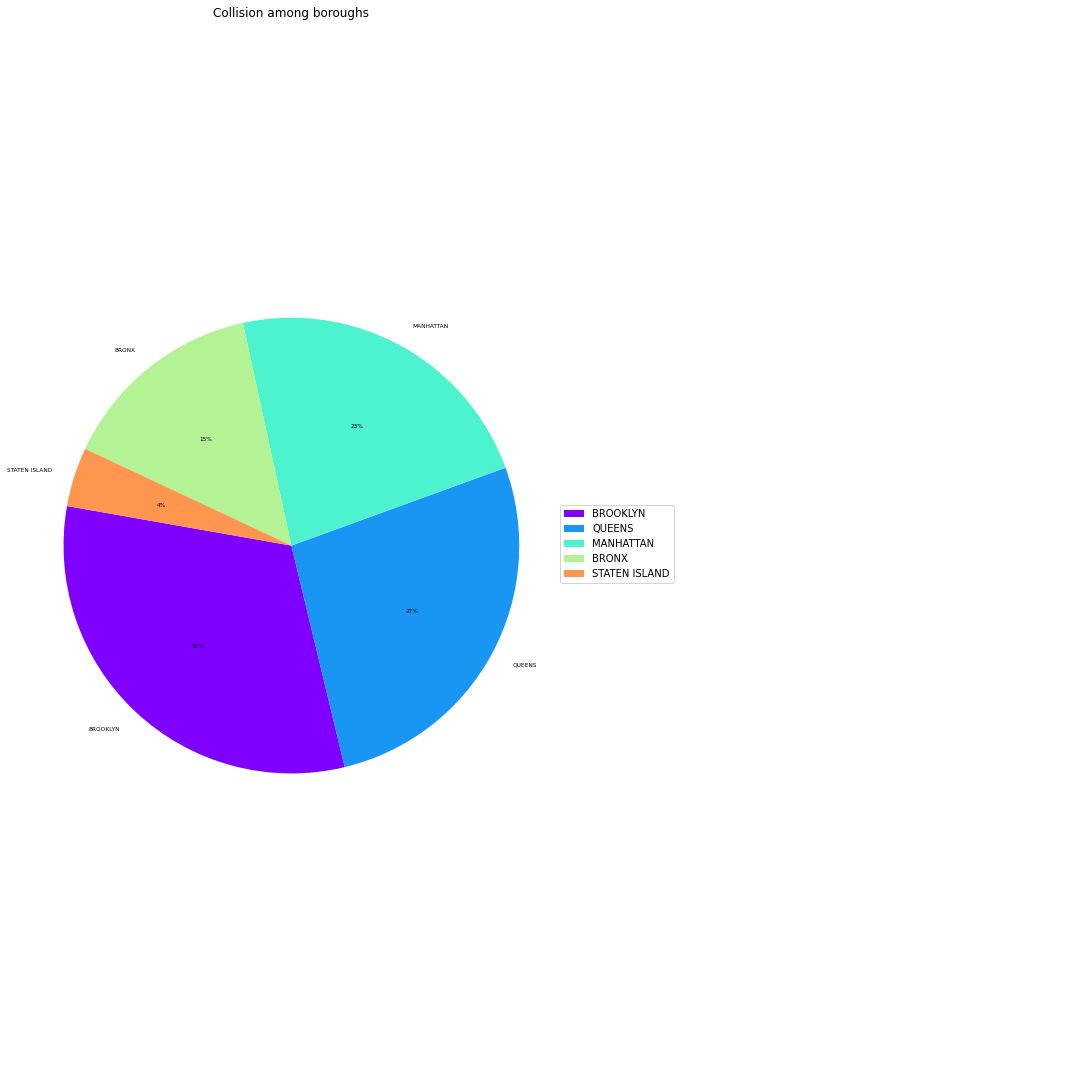

In [19]:
collisionBorough = collisionData['BOROUGH']
collisionBorough = collisionBorough.value_counts()
labels = collisionBorough.index
plotPieChart(collisionBorough,labels,"Collision among boroughs")

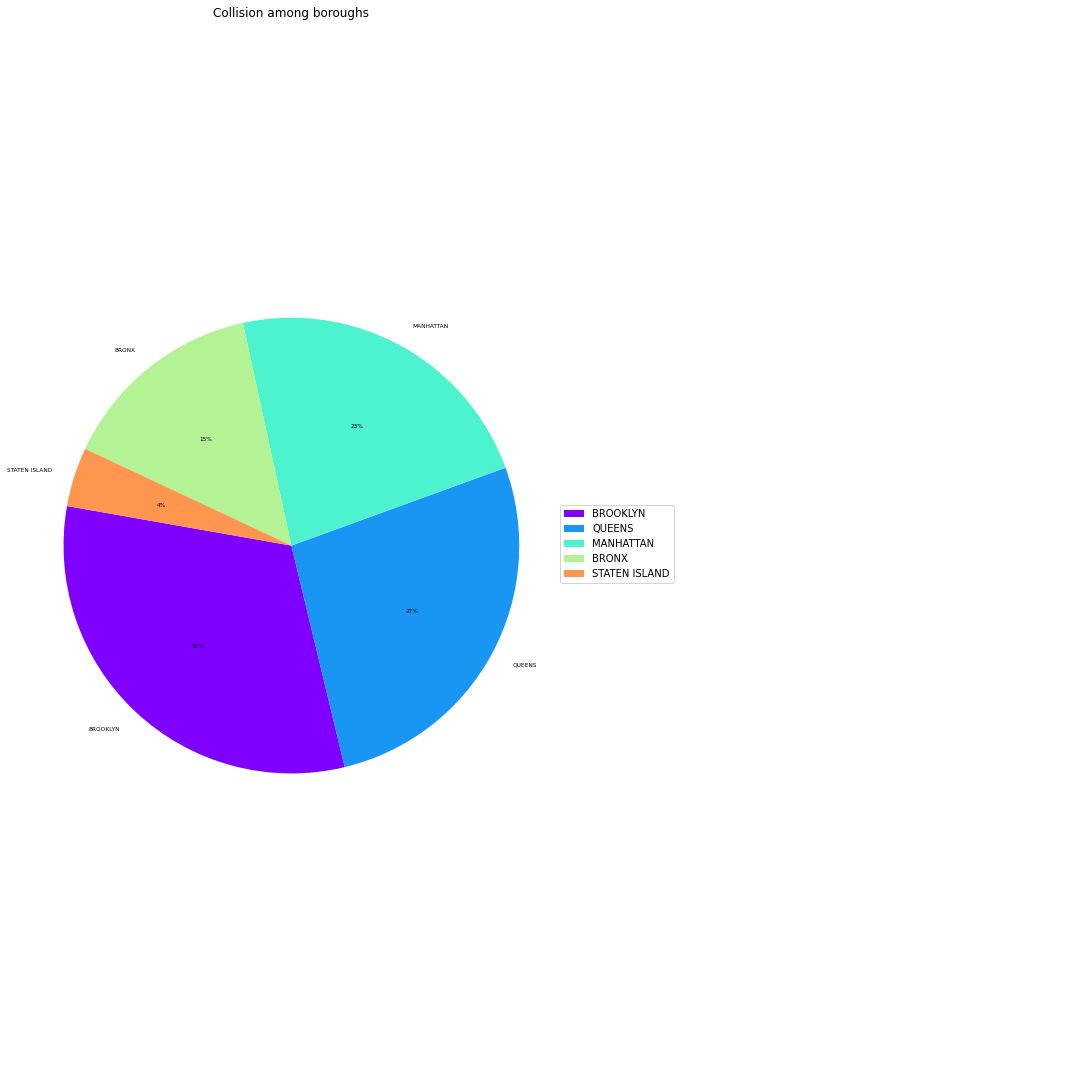

In [20]:
collisionBorough = collisionData['BOROUGH']
collisionBorough = collisionBorough.value_counts()
labels = collisionBorough.index
plotPieChart(collisionBorough,labels,"Collision among boroughs")

In [21]:
collisionVehicle = collisionData['VEHICLE TYPE CODE 1']
collisionVehicle = collisionVehicle.value_counts();
collisionVehicle.head()

Sedan                                  488424
PASSENGER VEHICLE                      416206
Station Wagon/Sport Utility Vehicle    387281
SPORT UTILITY / STATION WAGON          180291
Taxi                                    46548
Name: VEHICLE TYPE CODE 1, dtype: int64

Here we try to analyze the different car type of collision in different boroughs.

In [22]:
# this function extract exact number of collision in sedan,suv,taxi,and pick up truck in given borough.
def getBoroughDistribution(cityName,collisionData):
    borough = collisionData.loc[collisionData['BOROUGH']== cityName]
    borough = borough[borough['VEHICLE TYPE CODE 1'].notna()]
    borough['VEHICLE TYPE CODE 1'] = borough['VEHICLE TYPE CODE 1'].str.lower()
    borough.loc[borough['VEHICLE TYPE CODE 1'].str.contains('sedan'), 'VEHICLE TYPE CODE 1'] = 'sedan'
    borough.loc[borough['VEHICLE TYPE CODE 1'].str.contains('Sport'), 'VEHICLE TYPE CODE 1'] = 'SUV'
    sedanNum = len(borough.loc[borough['VEHICLE TYPE CODE 1'].str.contains('sedan')==True])
    pickUpNum = len(borough.loc[borough['VEHICLE TYPE CODE 1'].str.contains('pick')==True])
    taxiNum = len(borough.loc[borough['VEHICLE TYPE CODE 1'].str.contains('taxi')==True])
    SUVNum = len(borough.loc[borough['VEHICLE TYPE CODE 1'].str.contains('sport')==True])
    return [sedanNum,pickUpNum,taxiNum,SUVNum]

In [23]:
brooklyn = getBoroughDistribution('BROOKLYN',collisionData)
queens = getBoroughDistribution('QUEENS',collisionData)
bronx = getBoroughDistribution('BRONX',collisionData)
island = getBoroughDistribution('STATEN ISLAND',collisionData)
manhattan = getBoroughDistribution('MANHATTAN',collisionData)

In [24]:
columns = ["Sedan","Pick-up Truck", "Taxi","SUV"]
index = ['BROOKLYN','QUEENS','BRONX','STATEN ISLAND','MANHATTAN']
frames = [brooklyn,queens,bronx,island,manhattan]
frames = pd.DataFrame(frames,index = index,columns = columns)
frames

,Sedan,Pick-up Truck,Taxi,SUV
BROOKLYN,114462,7937,6903,125610
QUEENS,96267,7168,5413,115587
BRONX,57376,3612,4881,53853
STATEN ISLAND,15889,1569,80,16415
MANHATTAN,57604,7563,41501,68136


In [25]:
frames.reset_index(inplace=True)
frames = frames.rename(columns = {'index':'Borough'})
frames

,Borough,Sedan,Pick-up Truck,Taxi,SUV
0,BROOKLYN,114462,7937,6903,125610
1,QUEENS,96267,7168,5413,115587
2,BRONX,57376,3612,4881,53853
3,STATEN ISLAND,15889,1569,80,16415
4,MANHATTAN,57604,7563,41501,68136


<AxesSubplot:xlabel='Borough'>

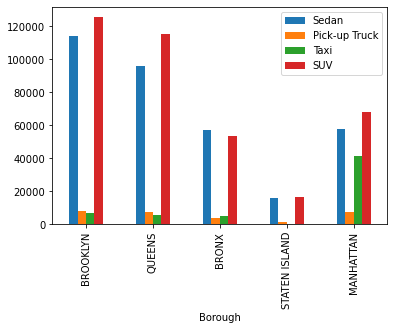

In [26]:
frames.plot(x='Borough',y=["Sedan","Pick-up Truck","Taxi","SUV"],kind ='bar')

In [27]:
airbnbData.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [28]:
avgData = airbnbData.groupby('neighbourhood_group')['price'].mean()
labels = avgData.index
labels

Index(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'], dtype='object', name='neighbourhood_group')

And let's plot out the average price of airbnb rent price in each borough.

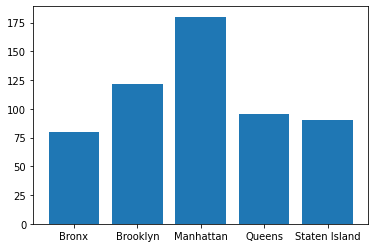

In [29]:
plt.bar(labels, avgData)
plt.show()

# Explore New York neighborhood data
Download and open json file from https://cocl.us/new_york_dataset

In [78]:
with open('data/nyu_2451_34572-geojson.json') as json_data:
    newyork_data = json.load(json_data)

In [79]:
neighborhoods_data = newyork_data['features']
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

Load json data into Pandas DataFrame

In [80]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough.upper(),
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
neighborhoods

,Borough,Neighborhood,Latitude,Longitude
0,BRONX,Wakefield,40.894705,-73.847201
1,BRONX,Co-op City,40.874294,-73.829939
2,BRONX,Eastchester,40.887556,-73.827806
3,BRONX,Fieldston,40.895437,-73.905643
4,BRONX,Riverdale,40.890834,-73.912585
...,...,...,...,...
301,MANHATTAN,Hudson Yards,40.756658,-74.000111
302,QUEENS,Hammels,40.587338,-73.805530
303,QUEENS,Bayswater,40.611322,-73.765968
304,QUEENS,Queensbridge,40.756091,-73.945631


Define a function that calculate the distance between a given point and neighborhoods

In [81]:
def get_neighborhood(location: tuple, borough: str) ->str:
    bor = neighborhoods.loc[neighborhoods.Borough == borough, ['Borough', 'Neighborhood', 'Latitude', 'Longitude']]
    bor['Distance'] = np.square(location[0] - bor['Latitude']) + np.square(location[1] - bor['Longitude'])
    min_index = bor['Distance'].idxmin()
    return bor.loc[min_index, 'Neighborhood']

In [82]:
get_neighborhood((40.895437, -73.905643), 'BRONX')

'Fieldston'

In [83]:
collisionData['CRASH DATE']

1         2021-04-13
13        2019-05-21
15        2021-02-26
17        2021-03-31
18        2021-04-06
             ...    
1883964   2012-07-07
1883965   2012-07-06
1883966   2012-07-03
1883967   2012-07-01
1883969   2012-07-05
Name: CRASH DATE, Length: 1266764, dtype: datetime64[ns]

Select data between 2017 and 2019 and drop the lines which have no location information

In [84]:
collisionData = collisionData.dropna(subset=['BOROUGH', 'LATITUDE', 'LONGITUDE'], how='any')
collisionData['CRASH DATE'] = pd.to_datetime(collisionData['CRASH DATE'],format="%m/%d/%Y")
mask = (collisionData['CRASH DATE'] >= '2012-01-01') & (collisionData['CRASH DATE'] <= '2016-12-31')
collisionData_2012_2016 = collisionData.loc[mask].copy()
collisionData_2012_2016

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
395,2016-04-16,14:20,BROOKLYN,11214.0,40.586277,-73.986200,"(40.586277, -73.9862)",WEST 17 STREET,BAY 50 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4408059,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
83545,2012-07-27,20:53,BROOKLYN,11233.0,40.676937,-73.921830,"(40.676937, -73.92183)",RALPH AVENUE,ATLANTIC AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4441145,Station Wagon/Sport Utility Vehicle,E-Scooter,NaN,NaN,NaN
85793,2012-08-01,10:22,BROOKLYN,11208.0,40.674520,-73.878044,"(40.67452, -73.878044)",PITKIN AVENUE,MONTAUK AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4443197,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN
154440,2012-09-25,12:36,QUEENS,11385.0,40.700005,-73.902960,"(40.700005, -73.90296)",WEIRFIELD STREET,SENECA AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4461135,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
159963,2016-06-06,14:56,BROOKLYN,11212.0,40.658183,-73.924644,"(40.6581825, -73.9246436)",EAST 91 STREET,CLARKSON AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3460534,4 dr sedan,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883964,2012-07-07,17:35,BROOKLYN,11235,40.575802,-73.961137,"(40.5758019, -73.9611371)",BRIGHTON 6 STREET,BRIGHTWATER COURT,NaN,...,Unspecified,NaN,NaN,NaN,113584,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
1883965,2012-07-06,15:09,MANHATTAN,10035,40.801235,-73.941815,"(40.8012354, -73.9418153)",EAST 119 STREET,PARK AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,59654,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
1883966,2012-07-03,17:30,QUEENS,11102,40.774711,-73.933386,"(40.7747112, -73.9333863)",27 AVENUE,4 STREET,NaN,...,Unspecified,NaN,NaN,NaN,272592,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
1883967,2012-07-01,15:30,BROOKLYN,11236,40.645032,-73.919978,"(40.6450318, -73.9199775)",RALPH AVENUE,CLARENDON ROAD,NaN,...,Unspecified,NaN,NaN,NaN,135041,SMALL COM VEH(4 TIRES),PASSENGER VEHICLE,NaN,NaN,NaN


In [ ]:
a = 0
for index, row in collisionData_2012_2016.iterrows():
    a += 1
    location = (row['LATITUDE'],row['LONGITUDE'])
    nbh = get_neighborhood(location, row['BOROUGH'])
    collisionData_2012_2016.loc[index,'NBH'] = nbh
    # if a % 1000 == 0:
    print(a)

In [86]:
collisionData_2012_2016

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,NBH
395,2016-04-16,14:20,BROOKLYN,11214.0,40.586277,-73.986200,"(40.586277, -73.9862)",WEST 17 STREET,BAY 50 STREET,NaN,...,NaN,NaN,NaN,4408059,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,Coney Island
83545,2012-07-27,20:53,BROOKLYN,11233.0,40.676937,-73.921830,"(40.676937, -73.92183)",RALPH AVENUE,ATLANTIC AVENUE,NaN,...,NaN,NaN,NaN,4441145,Station Wagon/Sport Utility Vehicle,E-Scooter,NaN,NaN,NaN,Ocean Hill
85793,2012-08-01,10:22,BROOKLYN,11208.0,40.674520,-73.878044,"(40.67452, -73.878044)",PITKIN AVENUE,MONTAUK AVENUE,NaN,...,NaN,NaN,NaN,4443197,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN,East New York
154440,2012-09-25,12:36,QUEENS,11385.0,40.700005,-73.902960,"(40.700005, -73.90296)",WEIRFIELD STREET,SENECA AVENUE,NaN,...,NaN,NaN,NaN,4461135,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,Ridgewood
159963,2016-06-06,14:56,BROOKLYN,11212.0,40.658183,-73.924644,"(40.6581825, -73.9246436)",EAST 91 STREET,CLARKSON AVENUE,NaN,...,NaN,NaN,NaN,3460534,4 dr sedan,NaN,NaN,NaN,NaN,Rugby
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883964,2012-07-07,17:35,BROOKLYN,11235,40.575802,-73.961137,"(40.5758019, -73.9611371)",BRIGHTON 6 STREET,BRIGHTWATER COURT,NaN,...,NaN,NaN,NaN,113584,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,Brighton Beach
1883965,2012-07-06,15:09,MANHATTAN,10035,40.801235,-73.941815,"(40.8012354, -73.9418153)",EAST 119 STREET,PARK AVENUE,NaN,...,NaN,NaN,NaN,59654,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,East Harlem
1883966,2012-07-03,17:30,QUEENS,11102,40.774711,-73.933386,"(40.7747112, -73.9333863)",27 AVENUE,4 STREET,NaN,...,NaN,NaN,NaN,272592,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,Ravenswood
1883967,2012-07-01,15:30,BROOKLYN,11236,40.645032,-73.919978,"(40.6450318, -73.9199775)",RALPH AVENUE,CLARENDON ROAD,NaN,...,NaN,NaN,NaN,135041,SMALL COM VEH(4 TIRES),PASSENGER VEHICLE,NaN,NaN,NaN,Remsen Village


In [68]:
print(collisionData_2012_2016['NBH'])

13          Vinegar Hill
161652     East Flatbush
161653     East Flatbush
204324    Morris Heights
204326        Lenox Hill
               ...      
929457        Holliswood
929458          Rosedale
929459          Elmhurst
929462         Homecrest
929463    Queens Village
Name: NBH, Length: 416416, dtype: object


## Get the neighborhood for crime

In [46]:
crimeData

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
3,189714430,11/07/2018,117.0,RECKLESS ENDANGERMENT 1,126.0,MISCELLANEOUS PENAL LAW,PL 1202500,F,M,26,0.0,45-64,M,WHITE,993685.0,233346.0,40.807160,-73.965920,POINT (-73.96591978699998 40.80715993100006)
5,190017529,11/15/2018,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,B,47,0.0,45-64,M,BLACK,1026486.0,262591.0,40.887333,-73.847250,POINT (-73.84725001299995 40.88733281800006)
10,189678705,11/07/2018,175.0,"SEXUAL ABUSE 3,2",233.0,SEX CRIMES,PL 13052A1,M,B,52,0.0,25-44,M,BLACK,1017542.0,255919.0,40.869059,-73.879630,POINT (-73.87963014799993 40.86905853200005)
14,189068425,10/22/2018,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,94,0.0,45-64,M,BLACK,995886.0,200705.0,40.717566,-73.958026,POINT (-73.95802570099994 40.71756616100004)
15,65864442,09/17/2009,164.0,SODOMY 3,116.0,SEX CRIMES,PL 1304002,F,S,122,0.0,25-44,M,BLACK HISPANIC,954943.0,148360.0,40.573850,-74.105496,POINT (-74.10549615599997 40.573849649000074)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5012951,206858026,12/27/2019,478.0,"THEFT OF SERVICES, UNCLASSIFIE",343.0,OTHER OFFENSES RELATED TO THEF,PL 1651503,M,K,73,0.0,25-44,M,BLACK,1008992.0,186404.0,40.678286,-73.910800,POINT (-73.91079962899994 40.67828631700008)
5012952,205304150,11/18/2019,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL05110A4,M,Q,114,4.0,25-44,M,BLACK,1006898.0,220358.0,40.771487,-73.918235,POINT (-73.91823481899996 40.771487379000064)
5012953,205307020,11/18/2019,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL05110EA,F,S,123,0.0,25-44,M,BLACK HISPANIC,923891.0,141449.0,40.554723,-74.217210,POINT (-74.21721022099996 40.55472331800007)
5012954,206301725,12/10/2019,779.0,"PUBLIC ADMINISTRATION,UNCLASSI",126.0,MISCELLANEOUS PENAL LAW,PL 215510B,F,Q,110,0.0,25-44,M,WHITE HISPANIC,1020237.0,210724.0,40.745000,-73.870128,POINT (-73.87012832399995 40.74500029700005)


In [47]:
crimeData['ARREST_DATE'] = pd.to_datetime(crimeData['ARREST_DATE'],format="%m/%d/%Y")
mask = (crimeData['ARREST_DATE'] >= '2017-01-01') & (crimeData['ARREST_DATE'] <= '2019-12-31')
crimeData_2017_2019 = crimeData.loc[mask].copy()
crimeData_2017_2019

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
3,189714430,2018-11-07,117.0,RECKLESS ENDANGERMENT 1,126.0,MISCELLANEOUS PENAL LAW,PL 1202500,F,M,26,0.0,45-64,M,WHITE,993685.0,233346.0,40.807160,-73.965920,POINT (-73.96591978699998 40.80715993100006)
5,190017529,2018-11-15,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,B,47,0.0,45-64,M,BLACK,1026486.0,262591.0,40.887333,-73.847250,POINT (-73.84725001299995 40.88733281800006)
10,189678705,2018-11-07,175.0,"SEXUAL ABUSE 3,2",233.0,SEX CRIMES,PL 13052A1,M,B,52,0.0,25-44,M,BLACK,1017542.0,255919.0,40.869059,-73.879630,POINT (-73.87963014799993 40.86905853200005)
14,189068425,2018-10-22,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,94,0.0,45-64,M,BLACK,995886.0,200705.0,40.717566,-73.958026,POINT (-73.95802570099994 40.71756616100004)
16,189989408,2018-11-14,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200000,M,B,40,0.0,25-44,M,BLACK,1005041.0,234533.0,40.810398,-73.924895,POINT (-73.92489531099994 40.810398494000026)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5012951,206858026,2019-12-27,478.0,"THEFT OF SERVICES, UNCLASSIFIE",343.0,OTHER OFFENSES RELATED TO THEF,PL 1651503,M,K,73,0.0,25-44,M,BLACK,1008992.0,186404.0,40.678286,-73.910800,POINT (-73.91079962899994 40.67828631700008)
5012952,205304150,2019-11-18,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL05110A4,M,Q,114,4.0,25-44,M,BLACK,1006898.0,220358.0,40.771487,-73.918235,POINT (-73.91823481899996 40.771487379000064)
5012953,205307020,2019-11-18,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL05110EA,F,S,123,0.0,25-44,M,BLACK HISPANIC,923891.0,141449.0,40.554723,-74.217210,POINT (-74.21721022099996 40.55472331800007)
5012954,206301725,2019-12-10,779.0,"PUBLIC ADMINISTRATION,UNCLASSI",126.0,MISCELLANEOUS PENAL LAW,PL 215510B,F,Q,110,0.0,25-44,M,WHITE HISPANIC,1020237.0,210724.0,40.745000,-73.870128,POINT (-73.87012832399995 40.74500029700005)


In [48]:
print(crimeData['ARREST_BORO'].unique())

['M' 'B' 'K' 'S' 'Q']


In [49]:
print(neighborhoods['Borough'].unique())

['BRONX' 'MANHATTAN' 'BROOKLYN' 'QUEENS' 'STATEN ISLAND']


"BORO_NM " represents the borough where suspects were arrested, which may differ from the borough where crime happened.

In [25]:
def getNameforBorough(letter:str)->str:
    if letter == 'M':
        borough= 'MANHATTAN'
    elif letter =='B':
        borough= 'BRONX'
    elif letter == 'K':
        borough= 'BROOKLYN'
    elif letter == 'S':
        borough= 'STATEN ISLAND'
    else:
        borough = 'QUEENS'
    return borough

In [51]:
neighborhoods.loc[neighborhoods['Neighborhood'] == 'Morningside Heights']

,Borough,Neighborhood,Latitude,Longitude
125,MANHATTAN,Morningside Heights,40.808,-73.963896


In [ ]:
for index, row in crimeData_2017_2019.iterrows():
    location = (row['Latitude'],row['Longitude'])
    boro = getNameforBorough(row['ARREST_BORO'])
    nbh = get_neighborhood(location, boro)
    crimeData_2017_2019.loc[index,'NBH'] = nbh

In [87]:
collisionData_2012_2016.to_csv('data/collisionData_2012_2016.csv', index=False)
crimeData_2017_2019.to_csv('data/crimeData_2017_2019.csv', index=False)

## Find target neighborhoods
Read collision and crime data with neighborhoods

In [121]:
collisionData_NBH = pd.read_csv('data/collisionData_NBH.csv')
crimeData_NBH = pd.read_csv('data/crimeData_NBH.csv')

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [270]:
print(collisionData_NBH['NBH'].head())
print(crimeData_NBH['NBH'].head())

0      Vinegar Hill
1     East Flatbush
2     East Flatbush
3    Morris Heights
4        Lenox Hill
Name: NBH, dtype: object
0        Mott Haven
1    Lincoln Square
2     Cypress Hills
3        Ocean Hill
4        Morrisania
Name: NBH, dtype: object


The number of crimes in a certain year

In [9]:
def get_crimes_year(df: pd.DataFrame, year: str):
    mask = (df['ARREST_DATE'] >= year + '-01-01') & (df['ARREST_DATE'] <= year + '-12-31')
    return len(df.loc[mask])

The number of crimes in each neighborhood from 2012 to 2019

In [125]:
nbh_crimes = pd.DataFrame(columns=['Borough', 'NBH', 'Crimes', 'Year'])  # the number of crimes in each neighborhood from 2012 to 2019
crime_boros = crimeData_NBH['ARREST_BORO'].unique()
for boro in crime_boros:
    crime_this_boro = crimeData_NBH[crimeData_NBH['ARREST_BORO'] == boro]  # crimes in this borough
    crime_nbhs = crime_this_boro['NBH'].unique()
    for nbh in crime_nbhs:
        crime_this_nbh = crime_this_boro[crime_this_boro['NBH'] == nbh]  # crimes in this neighborhood
        # add data from 2012 to 2019
        for i in range(2012, 2020):
            if nbh_crimes.empty:
                nbh_crimes.loc[0] = [boro, nbh, get_crimes_year(crime_this_nbh, str(i)), i]
            else: nbh_crimes.loc[nbh_crimes.index.max() + 1] = [boro, nbh, get_crimes_year(crime_this_nbh, str(i)), i]

In [126]:
nbh_crimes

,Borough,NBH,Crimes,Year
0,BRONX,Mott Haven,2233,2012
1,BRONX,Mott Haven,2231,2013
2,BRONX,Mott Haven,2326,2014
3,BRONX,Mott Haven,2020,2015
4,BRONX,Mott Haven,2061,2016
...,...,...,...,...
2443,QUEENS,Neponsit,2,2015
2444,QUEENS,Neponsit,2,2016
2445,QUEENS,Neponsit,3,2017
2446,QUEENS,Neponsit,0,2018


The number of collisions in a certain year

In [98]:
def get_collisiongs_year(df: pd.DataFrame, year: str):
    mask = (df['CRASH DATE'] >= year + '-01-01') & (df['CRASH DATE'] <= year + '-12-31')
    return len(df.loc[mask])

The number of collisions in each neighborhood from 2012 to 2019

In [114]:
nbh_collisions = pd.DataFrame(columns=['Borough', 'NBH', 'Collisions', 'Year'])  # the number of crimes in each neighborhood from 2012 to 2019
collision_boros = collisionData_NBH['BOROUGH'].unique()
for boro in collision_boros:
    collision_this_boro = collisionData_NBH[collisionData_NBH['BOROUGH'] == boro]  # collisions in this borough
    collision_nbhs = collision_this_boro['NBH'].unique()
    for nbh in collision_nbhs:
        collision_this_nbh = collision_this_boro[collision_this_boro['NBH'] == nbh]  # collisions in this neighborhood
        # add data from 2012 to 2019
        for i in range(2012, 2020):
            num = get_collisiongs_year(collision_this_nbh, str(i))
            # the data in 2012 starts in July. We should mutiply number of collisions in this year with 2 to estimate the whole year.
            if i == 2012:
                num *= 2
            if nbh_collisions.empty:
                nbh_collisions.loc[0] = [boro, nbh, num, i]
            else: nbh_collisions.loc[nbh_collisions.index.max() + 1] = [boro, nbh, num, i]

Write data into csv files

In [243]:
nbh_collisions.to_csv('data/collisions_by_year.csv', index=False)
nbh_crimes.to_csv('data/crimes_by_year.csv', index=False)

Calculate the change rate of a certain year

In [103]:
def get_change_rate(start: int, end: int):
    return (end - start) / start

Get the change rate by year DataFrame

In [134]:
def change_rate_by_year(df: pd.DataFrame, boundary: int):
    res_df = pd.DataFrame(columns=['Borough', 'NBH', 'Overall_Change_Rate'])
    for boro in df['Borough'].unique():
        this_boro = df[df['Borough'] == boro]  # number of collisions or crimes in this borough
        for nbh in this_boro['NBH'].unique():
            this_nbh = this_boro[this_boro['NBH'] == nbh]  # number of collisions or crimes in this neighborhood
            
            # we set a boundary to choose data because if the number is too small, the change rate would be too high to have realistic meanings
            if (this_nbh.iloc[:, [2]].max() < boundary).bool():
                break
            data = [boro, nbh]

            # get the change rate of this year
            change_rate = get_change_rate(this_nbh.loc[this_nbh.index[0]][2], this_nbh.loc[this_nbh.index[-1]][2])
            data.append(change_rate)

            # from the starting year to the end year
            for i in range(this_nbh.index[0], this_nbh.index[-1]):
                year_change_rate = get_change_rate(this_nbh.loc[i][2], this_nbh.loc[i + 1][2])

                # the column name
                label = str(this_nbh.loc[i][3]) + ' - ' + str(this_nbh.loc[i + 1][3])
                if label not in res_df.columns:
                    res_df.insert(res_df.shape[1], label, np.nan)
                for j in range(len(data), list(res_df.columns).index(label) + 1):
                    if j == list(res_df.columns).index(label):
                        data.append(year_change_rate)
                    else: data.append(np.nan)
            
            # add data to result dataframe
            if res_df.empty:
                res_df.loc[0] = data
            else: res_df.loc[res_df.index.max() + 1] = data
    return res_df


Get the change rate of collision and crime data

In [145]:
collision_change_rate = change_rate_by_year(nbh_collisions, 100)
crime_change_rate = change_rate_by_year(nbh_crimes, 50)

In [142]:
crime_change_rate

,Borough,NBH,Overall_Change_Rate,2012 - 2013,2013 - 2014,2014 - 2015,2015 - 2016,2016 - 2017,2017 - 2018,2018 - 2019
0,BRONX,Mott Haven,-0.537394,-0.000896,0.042582,-0.131556,0.020297,-0.287724,-0.231608,-0.084220
1,BRONX,Morrisania,-0.727034,0.218723,-0.089734,-0.053628,-0.052500,-0.251539,-0.435958,-0.350000
2,BRONX,Norwood,-0.484706,0.054118,-0.006696,-0.341573,0.098976,-0.220497,-0.047809,-0.083682
3,BRONX,Edenwald,-0.132104,0.178187,-0.009126,-0.038158,0.012312,-0.104054,0.031674,-0.173977
4,BRONX,Belmont,-0.557265,-0.112821,-0.132948,-0.186667,-0.076503,-0.020710,-0.108761,-0.122034
...,...,...,...,...,...,...,...,...,...,...
147,QUEENS,Briarwood,-0.513678,0.401216,0.002169,0.177489,-0.213235,-0.044393,-0.151589,-0.538905
148,QUEENS,Queensbridge,-0.690789,0.059211,0.130435,-0.412088,0.056075,-0.194690,-0.208791,-0.347222
149,QUEENS,Far Rockaway,-0.198364,-0.083845,0.209821,0.055351,-0.040210,-0.072860,0.056974,-0.271375
150,QUEENS,Queensboro Hill,-0.513514,0.067568,0.069620,-0.396450,-0.215686,0.475000,-0.338983,-0.076923


In [137]:
collision_change_rate

,Borough,NBH,Overall_Change_Rate,2012 - 2013,2013 - 2014,2014 - 2015,2015 - 2016,2016 - 2017,2017 - 2018,2018 - 2019
0,BROOKLYN,Vinegar Hill,-0.273333,-0.266667,-0.109091,0.387755,-0.088235,-0.169355,0.038835,0.018692
1,BROOKLYN,East Flatbush,-0.067416,-0.016854,-0.043810,0.049801,-0.053131,0.024048,-0.076321,0.055085
2,BROOKLYN,Prospect Heights,-0.245455,0.219192,0.022370,-0.051864,-0.184615,-0.092243,-0.040416,-0.101083
3,BROOKLYN,Borough Park,-0.116317,0.064620,0.025797,0.031065,-0.233859,0.156367,0.088259,-0.186012
4,BROOKLYN,Cobble Hill,-0.003546,-0.007092,0.007143,-0.003546,0.071174,-0.006645,-0.070234,0.010791
...,...,...,...,...,...,...,...,...,...,...
186,STATEN ISLAND,Grant City,-0.632743,-0.283186,0.043210,-0.065089,0.044304,0.000000,0.048485,-0.520231
187,STATEN ISLAND,Oakwood,-0.647887,-0.161972,0.058824,-0.230159,-0.051546,0.021739,-0.085106,-0.418605
188,STATEN ISLAND,Grymes Hill,-0.358696,0.336957,-0.138211,-0.009434,-0.161905,0.136364,0.150000,-0.486957
189,STATEN ISLAND,Tompkinsville,-0.007937,0.341270,-0.041420,0.086420,-0.113636,0.230769,-0.067708,-0.301676


Use the change rate to find our target neighborhoods

In [129]:
def find_tar_nbh(df: pd.DataFrame):
    target_nbh = pd.DataFrame(columns=collision_change_rate.columns)
    for boro in df['Borough'].unique():
        this_boro = df[df['Borough'] == boro].copy()

        # sort the change rate
        this_boro.sort_values(by=['Overall_Change_Rate'], inplace=True)
        this_boro = this_boro.reset_index()
        
        # for each borough, the target neighborhoods are whose crime rate and collision rate increased the most and decreased the most
        if target_nbh.empty:
            target_nbh.loc[0] = this_boro.iloc[0]
            target_nbh.loc[1] = this_boro.iloc[-1]
        else:
            target_nbh.loc[target_nbh.index.max() + 1] = this_boro.iloc[0]
            target_nbh.loc[target_nbh.index.max() + 1] = this_boro.iloc[-1]
    return target_nbh

In [146]:
collision_tar_nbh = find_tar_nbh(collision_change_rate)
crime_tar_nbh = find_tar_nbh(crime_change_rate)

Write data to csv files

In [149]:
collision_tar_nbh.to_csv('data/collision_tar_nbh.csv', index=False)
crime_tar_nbh.to_csv('data/crime_tar_nbh.csv', index=False)

## Analyze the correlation between crimes, collisions and property prices
Read the property sales data, collisions and crimes data

In [265]:
BronxData = pd.read_csv("Data/property_sales/BRONX/Bronx-mergeData.csv").dropna()
QueensData = pd.read_csv("Data/property_sales/QUEENS/Queens-mergeData.csv").dropna()
BrooklynData = pd.read_csv("Data/property_sales/BROOKLYN/Brooklyn-mergeData.csv").dropna()
ManhattanData = pd.read_csv("Data/property_sales/MANHATTAN/Manhattan-mergeData.csv").dropna()
StatenIslandData = pd.read_csv("Data/property_sales/STATEN ISLAND/StatenIsland-mergeData.csv").dropna()
nbh_collisions = pd.read_csv('data/collisions_by_year.csv')
nbh_crimes = pd.read_csv('data/crimes_by_year.csv')

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3

Match the neighborhood names

In [245]:
QueensData['Neighborhood'] = QueensData['Neighborhood'].str.rstrip()
BronxData['Neighborhood'] = BronxData['Neighborhood'].str.rstrip()
BrooklynData['Neighborhood'] = BrooklynData['Neighborhood'].str.rstrip()
ManhattanData['Neighborhood'] = ManhattanData['Neighborhood'].str.rstrip()
StatenIslandData['Neighborhood'] = StatenIslandData['Neighborhood'].str.rstrip()
collision_tar_nbh['NBH'] = collision_tar_nbh['NBH'].str.upper()
crime_tar_nbh['NBH'] = crime_tar_nbh['NBH'].str.upper()
nbh_collisions['NBH'] = nbh_collisions['NBH'].str.upper()
nbh_crimes['NBH'] = nbh_crimes['NBH'].str.upper()

Find the neighborhoods that we need in property sales data

In [246]:
def find_tar_price(priceData:pd.DataFrame, tar_nbh: list):
    mask = (priceData['Sale Date'] >= '2012-01-01') & (priceData['Sale Date'] <= '2019-12-31') & (priceData['Neighborhood'].isin(tar_nbh))
    tarData = priceData.loc[mask].copy()
    return tarData

These are the target neighborhoods in 5 boroughs which also have enough sales data to calculate property prices

In [247]:
QueensCollisionTarData = find_tar_price(QueensData, ['LONG ISLAND CITY', 'ROCKAWAY PARK'])
BrooklynCollisionTarData = find_tar_price(BrooklynData, ['CROWN HEIGHTS', 'SPRING CREEK'])
BronxCollisionTarData = find_tar_price(BronxData, ['HIGHBRIDGE/MORRIS HEIGHTS', 'MOTT HAVEN/PORT MORRIS'])
ManhattanCollisionTarData = find_tar_price(ManhattanData, ['MANHATTAN VALLEY', 'FINANCIAL'])
StatenCollisionTarData = find_tar_price(StatenIslandData, ['WILLOWBROOK	', 'TOMPKINSVILLE'])
print(QueensCollisionTarData['Neighborhood'].unique())
print(BrooklynCollisionTarData['Neighborhood'].unique())
print(BronxCollisionTarData['Neighborhood'].unique())
print(ManhattanCollisionTarData['Neighborhood'].unique())
print(StatenCollisionTarData['Neighborhood'].unique())

['LONG ISLAND CITY' 'ROCKAWAY PARK']
['CROWN HEIGHTS']
['HIGHBRIDGE/MORRIS HEIGHTS' 'MOTT HAVEN/PORT MORRIS']
['FINANCIAL' 'MANHATTAN VALLEY']
['TOMPKINSVILLE']


Calculate the average property prices in a certain year

In [248]:
def get_avg_year_price(this_nbh:pd.DataFrame, year: int):
    mask = (this_nbh['Sale Date'] >= year + '-01-01') & (this_nbh['Sale Date'] <= year + '-12-31')
    this_year = this_nbh.loc[mask]
    return this_year['Avg Price'].mean(axis=0)

Merge the target collision data and the target property price data

In [249]:
def merge_price_collision(price_tar: pd.DataFrame, collision_tar: pd.DataFrame, price_nbh: list, collision_nbh: list):
    nbh_prop_price = pd.DataFrame(columns=['NBH', 'Price', 'Year'])
    this_nbh = price_tar.loc[price_tar['Neighborhood'] == price_nbh].copy()
    this_nbh['Avg Price'] = this_nbh['Sale Price'] / this_nbh['Land Square Feet']
    for i in range(2012, 2020):
            if nbh_prop_price.empty:
                nbh_prop_price.loc[0] = [nbh, get_avg_year_price(this_nbh, str(i)), i]
            else: nbh_prop_price.loc[nbh_prop_price.index.max() + 1] = [nbh, get_avg_year_price(this_nbh, str(i)), i]
    tar = pd.merge(nbh_prop_price[['Price', 'Year']], collision_tar[collision_tar['NBH'] == collision_nbh][['Collisions', 'Year']], how='inner', on=['Year'])
    return tar

In [250]:
longIslandCity_collision = merge_price_collision(QueensCollisionTarData, nbh_collisions, 'LONG ISLAND CITY', 'RAVENSWOOD')
rockawayPark_collision = merge_price_collision(QueensCollisionTarData, nbh_collisions, 'ROCKAWAY PARK', 'ROCKAWAY PARK')
crownHeights_collision = merge_price_collision(BrooklynCollisionTarData, nbh_collisions, 'CROWN HEIGHTS', 'CROWN HEIGHTS')
highBridge_collision = merge_price_collision(BronxCollisionTarData, nbh_collisions, 'HIGHBRIDGE/MORRIS HEIGHTS', 'HIGH  BRIDGE')
mottHeaven_collision = merge_price_collision(BronxCollisionTarData, nbh_collisions, 'MOTT HAVEN/PORT MORRIS', 'MOTT HAVEN')
financial_collision = merge_price_collision(ManhattanCollisionTarData, nbh_collisions, 'FINANCIAL', 'FINANCIAL DISTRICT')
manhattanValley_collision = merge_price_collision(ManhattanCollisionTarData, nbh_collisions, 'MANHATTAN VALLEY', 'MANHATTANVILLE')
tompkinsville_collision = merge_price_collision(StatenCollisionTarData, nbh_collisions, 'TOMPKINSVILLE', 'TOMPKINSVILLE')

<AxesSubplot:title={'center':'Tompkinsville'}, xlabel='Year'>

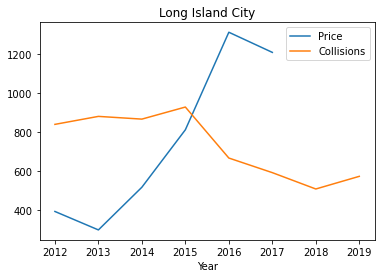

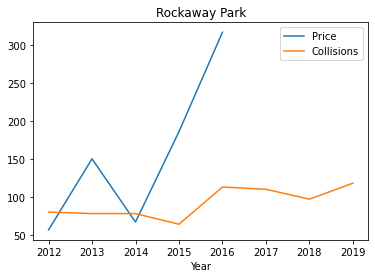

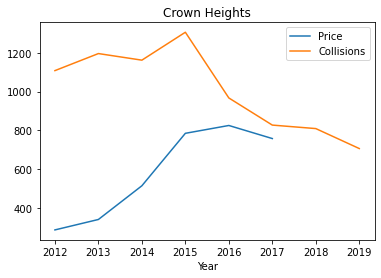

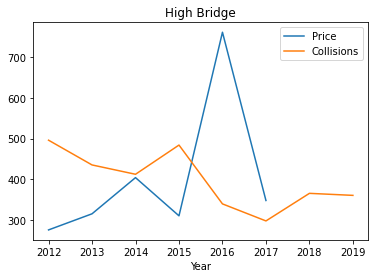

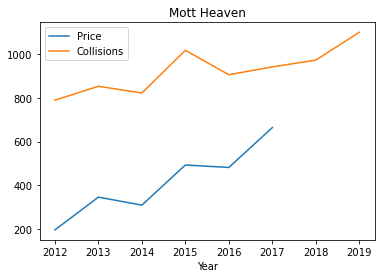

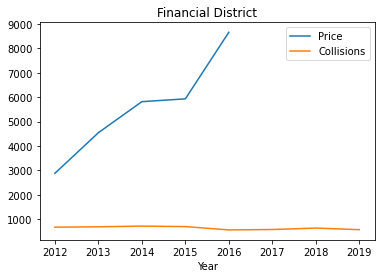

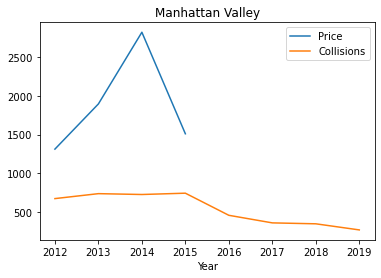

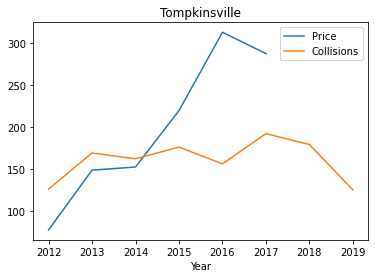

In [251]:
longIslandCity_collision.plot(x='Year', y=['Price', 'Collisions'], title='Long Island City')
rockawayPark_collision.plot(x='Year', y=['Price', 'Collisions'], title='Rockaway Park')
crownHeights_collision.plot(x='Year', y=['Price', 'Collisions'], title='Crown Heights')
highBridge_collision.plot(x='Year', y=['Price', 'Collisions'], title='High Bridge')
mottHeaven_collision.plot(x='Year', y=['Price', 'Collisions'], title='Mott Heaven')
financial_collision.plot(x='Year', y=['Price', 'Collisions'], title='Financial District')
manhattanValley_collision.plot(x='Year', y=['Price', 'Collisions'], title='Manhattan Valley')
tompkinsville_collision.plot(x='Year', y=['Price', 'Collisions'], title='Tompkinsville')

Let's do the same thing on crime data

In [260]:
QueensCrimeTarData = find_tar_price(QueensData, ['LONG ISLAND CITY', 'QUEENS VILLAGE'])
BrooklynCrimeTarData = find_tar_price(BrooklynData, ['DUMBO', 'DYKER HEIGHTS'])
BronxCrimeTarData = find_tar_price(BronxData, ['HUNTS POINT', 'WOODLAWN'])
ManhattanCrimeTarData = find_tar_price(ManhattanData, ['GREENWICH VILLAGE-WEST', 'GREENWICH VILLAGE-CENTRAL'])
ManhattanCrimeTarData['Neighborhood'].replace('GREENWICH VILLAGE-WEST', 'GREENWICH VILLAGE', inplace=True)
ManhattanCrimeTarData['Neighborhood'].replace('GREENWICH VILLAGE-CENTRAL', 'GREENWICH VILLAGE', inplace=True)
print(QueensCrimeTarData['Neighborhood'].unique())
print(BrooklynCrimeTarData['Neighborhood'].unique())
print(BronxCrimeTarData['Neighborhood'].unique())
print(ManhattanCrimeTarData['Neighborhood'].unique())

['LONG ISLAND CITY' 'QUEENS VILLAGE']
['DYKER HEIGHTS']
['HUNTS POINT' 'WOODLAWN']
['GREENWICH VILLAGE']


In [261]:
def merge_price_crime(price_tar: pd.DataFrame, crime_tar: pd.DataFrame, price_nbh: list, crime_nbh: list):
    nbh_prop_price = pd.DataFrame(columns=['NBH', 'Price', 'Year'])
    this_nbh = price_tar.loc[price_tar['Neighborhood'] == price_nbh].copy()
    this_nbh['Avg Price'] = this_nbh['Sale Price'] / this_nbh['Land Square Feet']
    for i in range(2012, 2020):
            if nbh_prop_price.empty:
                nbh_prop_price.loc[0] = [nbh, get_avg_year_price(this_nbh, str(i)), i]
            else: nbh_prop_price.loc[nbh_prop_price.index.max() + 1] = [nbh, get_avg_year_price(this_nbh, str(i)), i]
    tar = pd.merge(nbh_prop_price[['Price', 'Year']], crime_tar[crime_tar['NBH'] == crime_nbh][['Crimes', 'Year']], how='inner', on=['Year'])
    return tar

In [268]:
longIslandCity_crime = merge_price_crime(QueensCrimeTarData, nbh_crimes, 'LONG ISLAND CITY', 'QUEENSBRIDGE')
queensVillage_crime = merge_price_crime(QueensCrimeTarData, nbh_crimes, 'QUEENS VILLAGE', 'BELLAIRE')
dykerHeights_crime = merge_price_crime(BrooklynCrimeTarData, nbh_crimes, 'DYKER HEIGHTS', 'DYKER HEIGHTS')
huntsPoint_crime = merge_price_crime(BronxCrimeTarData, nbh_crimes, 'HUNTS POINT', 'HUNTS POINT')
woodlawn_crime = merge_price_crime(BronxCrimeTarData, nbh_crimes, 'WOODLAWN', 'WOODLAWN')
greenwich_crime = merge_price_crime(ManhattanCrimeTarData, nbh_crimes, 'GREENWICH VILLAGE', 'GREENWICH VILLAGE')

<AxesSubplot:title={'center':'Greenwich Village'}, xlabel='Year'>

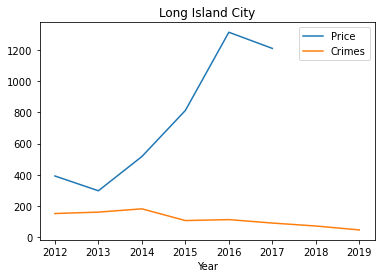

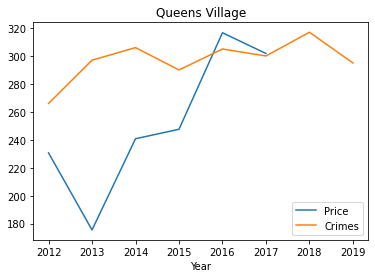

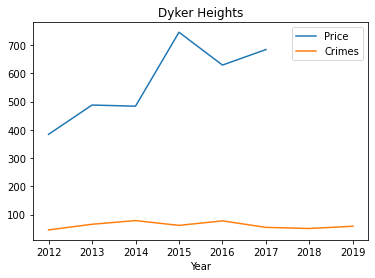

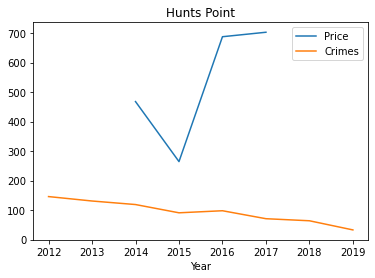

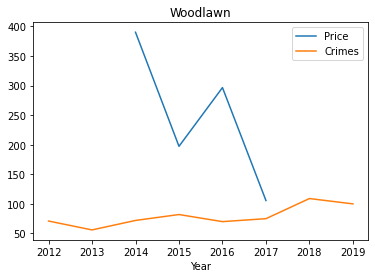

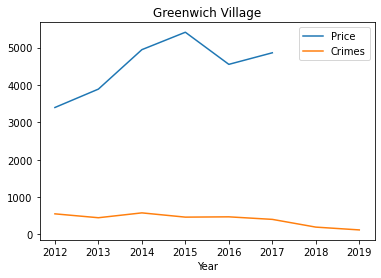

In [269]:
longIslandCity_crime.plot(x='Year', y=['Price', 'Crimes'], title='Long Island City')
queensVillage_crime.plot(x='Year', y=['Price', 'Crimes'], title='Queens Village')
dykerHeights_crime.plot(x='Year', y=['Price', 'Crimes'], title='Dyker Heights')
huntsPoint_crime.plot(x='Year', y=['Price', 'Crimes'], title='Hunts Point')
woodlawn_crime.plot(x='Year', y=['Price', 'Crimes'], title='Woodlawn')
greenwich_crime.plot(x='Year', y=['Price', 'Crimes'], title='Greenwich Village')